### Jordan Bramble

### Homework 8

#### Section 9.7 Problem 3

ERROR: Error in file(con, "rb"): cannot open the connection


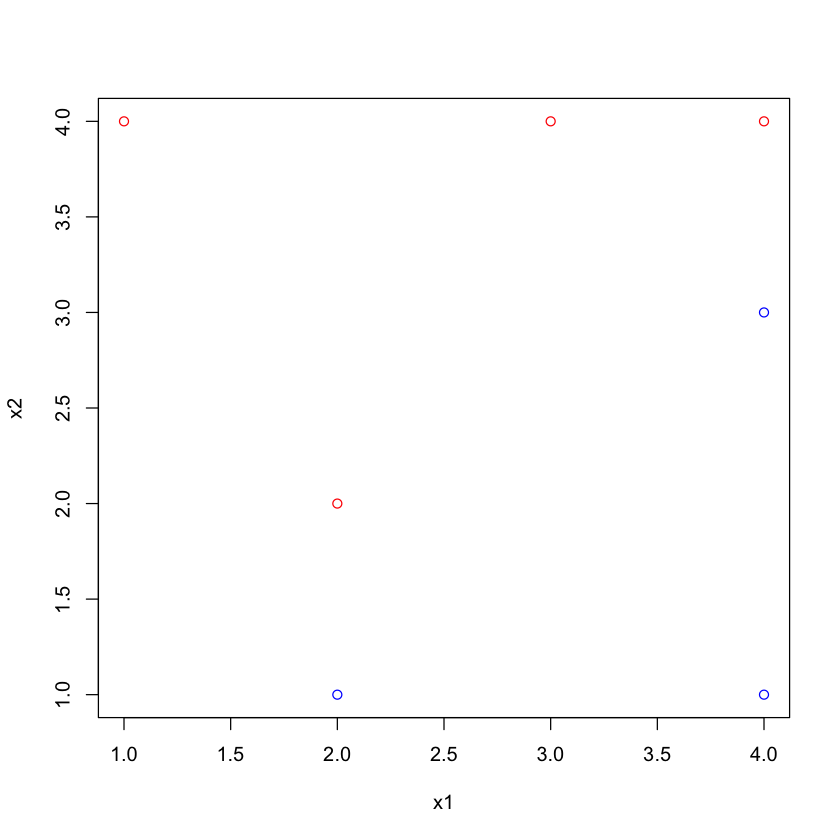

In [2]:
x1 = c(3, 2, 4, 1, 2, 4, 4)
x2 = c(4, 2, 4, 4, 1, 3, 1)
colors = c("red", "red", "red", "red", "blue", "blue", "blue")
plot(x1, x2, col=colors)

##### b.

X2 = X1 - .5

#### c. 

B0 = .5, B1 = -1, B2 = 1

#### d. 

ERROR: Error in file(con, "rb"): cannot open the connection


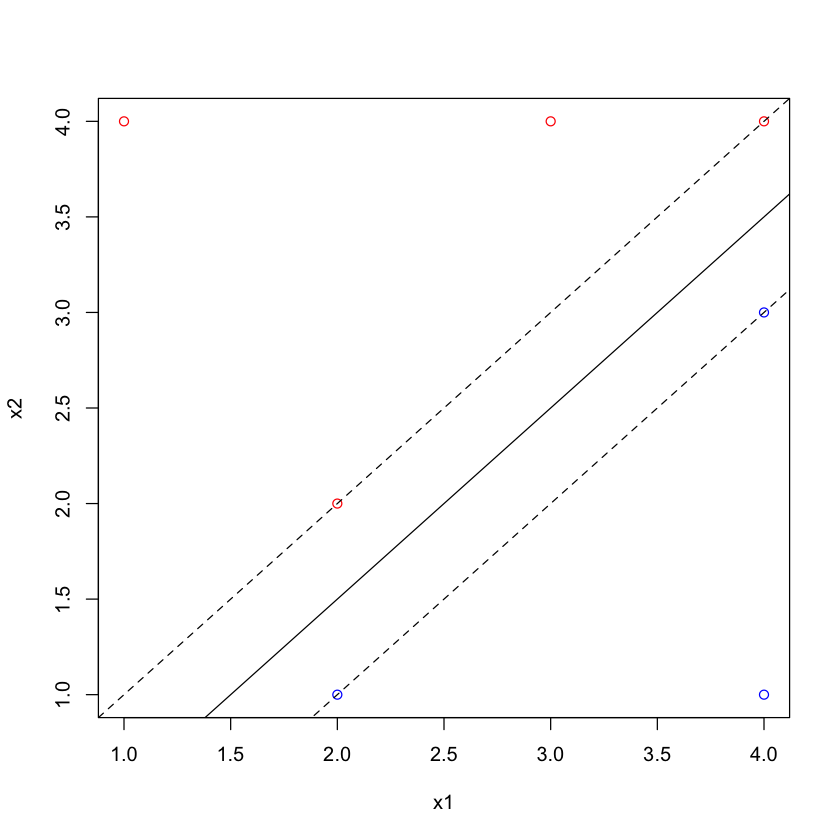

In [3]:
plot(x1, x2, col=colors)
abline(-0.5, 1)
abline(-1, 1, lty = 2)
abline(0, 1, lty = 2)

#### f.

because the 7th observation is so far from the margin, it would not affect the margin classifier much

#### g

ERROR: Error in file(con, "rb"): cannot open the connection


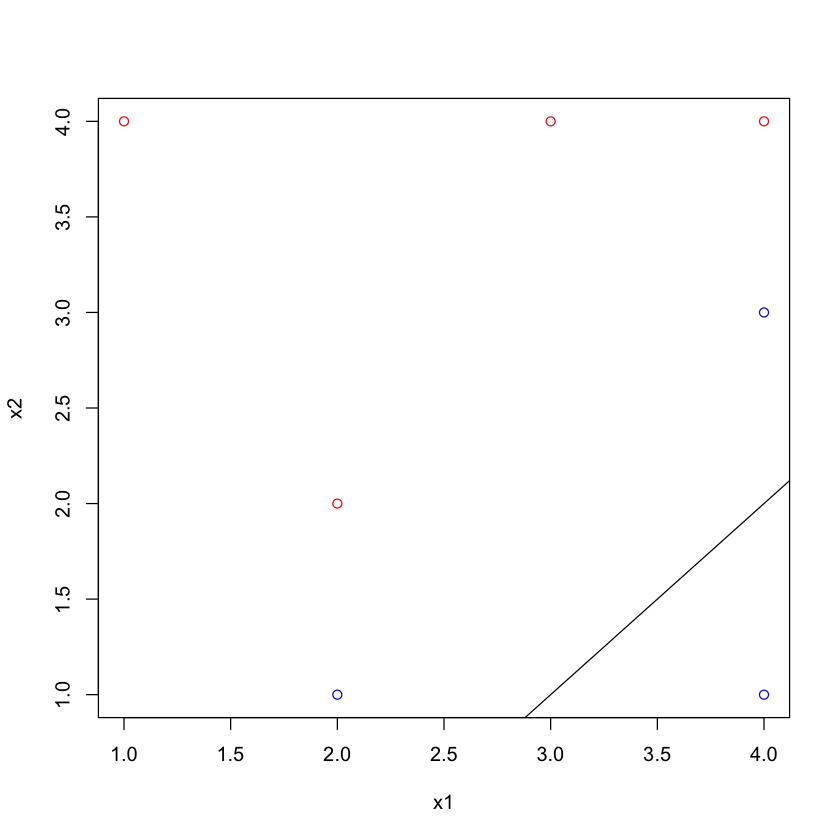

In [6]:
plot(x1, x2, col = colors)
abline(-2, 1)

-2 - x1 + x2

#### h. 

ERROR: Error in file(con, "rb"): cannot open the connection


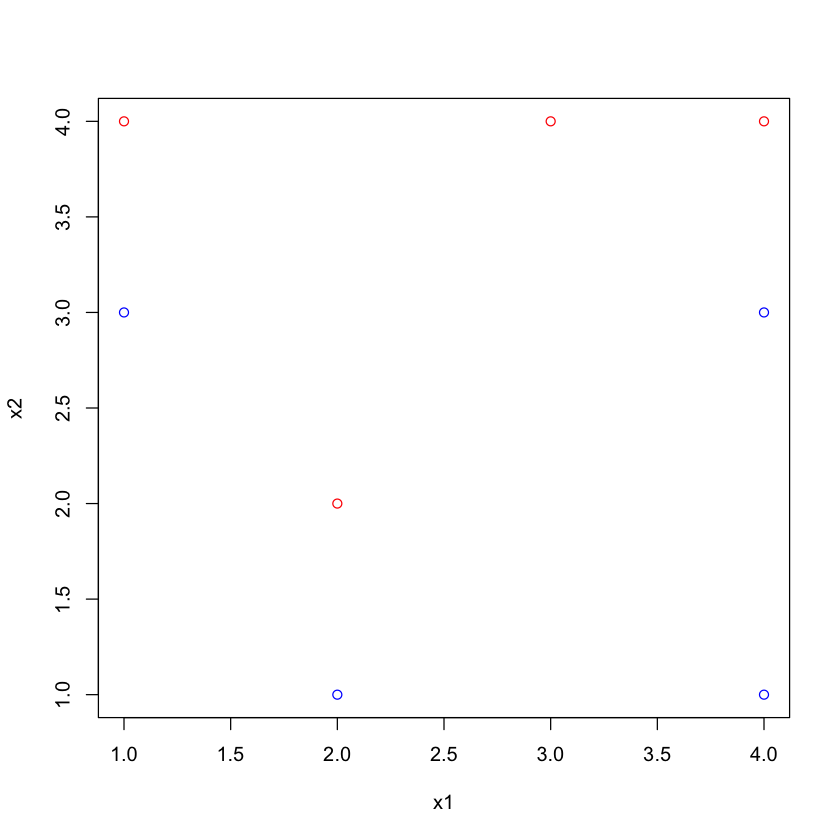

In [7]:
plot(x1, x2, col=colors)
points(c(1), c(3), col = c("blue"))

#### Section 9.7 problem 4

ERROR: Error in file(con, "rb"): cannot open the connection


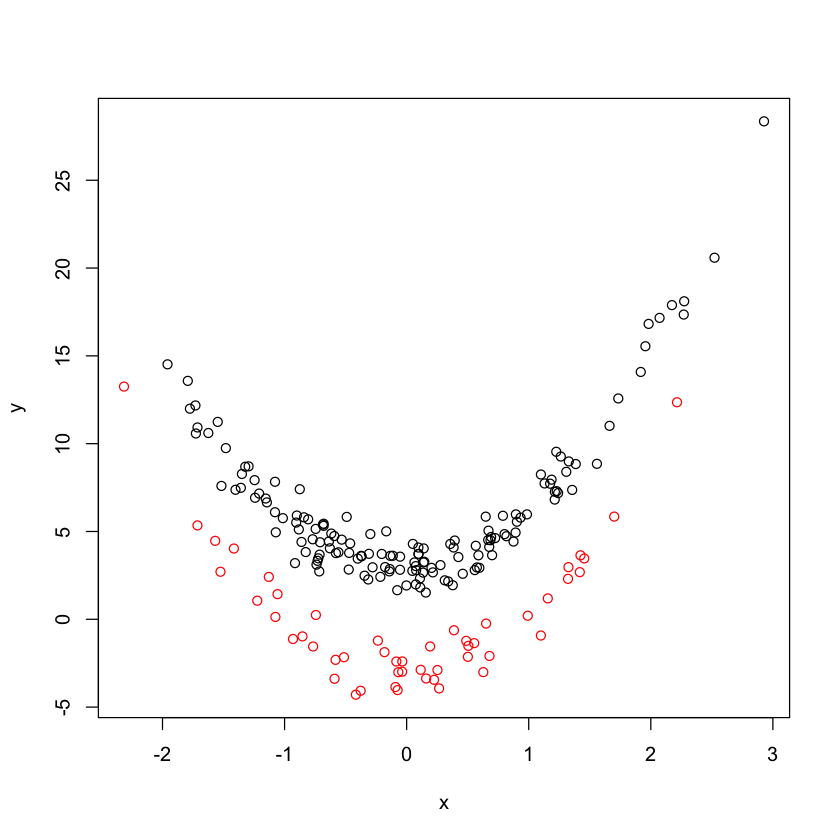

In [13]:
x = rnorm(200)
y = 3*x^2 + rnorm(100)
z = c(rep(1,150), rep(2,50))
y[1:150]=y[1:150] + 3
y[151:200]=y[151:200] - 3
res = data.frame(x,y, z = as.factor(z))
plot(res[,1:2], col=z)

In [15]:
library(e1071)
training = sample(200, 100)
train = res[training,]
test = res[-training,]

In [16]:
svmRad = svm(z~., train, kernel="radial")
summary(svmRad)


Call:
svm(formula = z ~ ., data = train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  31

 ( 14 17 )


Number of Classes:  2 

Levels: 
 1 2




In [18]:
predRad = predict(svmRad, data=train)
table(predRad, train$z)
mean(predRad != train$z)

       
predRad  1  2
      1 76  2
      2  0 22

[1] 0.02

ERROR: Error in file(con, "rb"): cannot open the connection


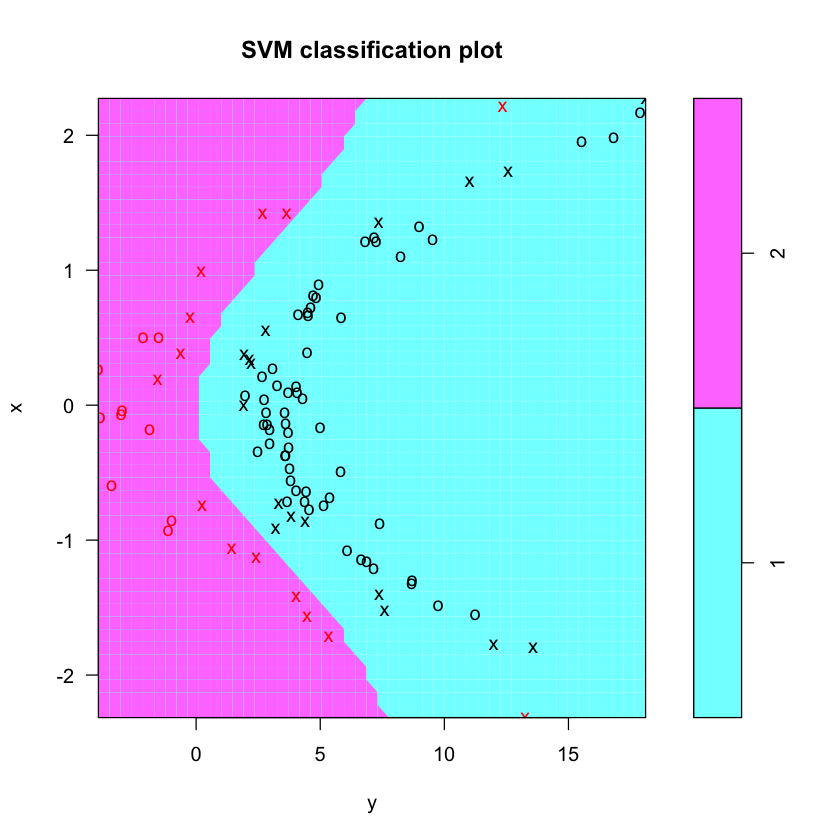

In [19]:
plot(svmRad ,train)

In [20]:
svmLin = svm(z~.,train, kernel="linear")
summary(svmLin)


Call:
svm(formula = z ~ ., data = train, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  37

 ( 18 19 )


Number of Classes:  2 

Levels: 
 1 2




In [21]:
predLin = predict(svmLin, data=train)
table(predLin,train$z)
mean(predLin != train$z)

       
predLin  1  2
      1 76  9
      2  0 15

[1] 0.09

ERROR: Error in file(con, "rb"): cannot open the connection


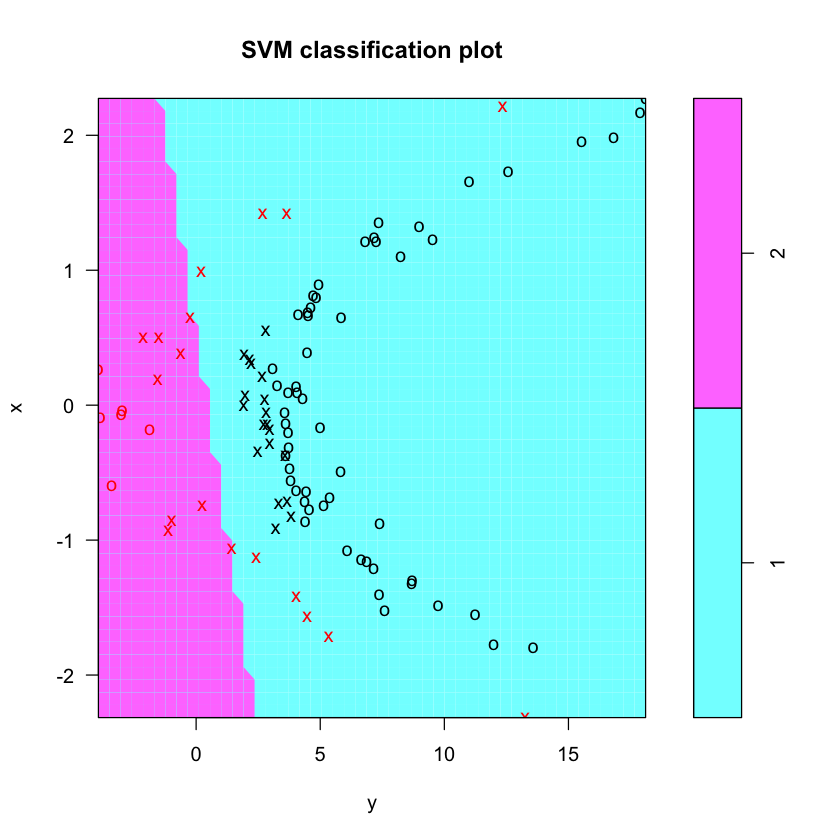

In [22]:
plot(svmLin ,train)

we see that Radial performs better on training data

In [23]:
predRad=predict(svmRad, data=test)
table(predRad, test$z)
mean(predRad != test$z)

       
predRad  1  2
      1 55 23
      2 19  3

[1] 0.42

In [24]:
predLin=predict(svmLin, data=test)
table(predLin,test$z)
mean(predLin != test$z)

       
predLin  1  2
      1 61 24
      2 13  2

[1] 0.37

We see that Linear performs better on test

#### Section 9.7 problem 7

In [26]:
library(ISLR)

In [27]:
mpg = median(Auto$mpg)
Auto$mpg[Auto$mpg<=mpg] = 0
Auto$mpg[Auto$mpg>mpg] = 1
Auto$mpg = as.factor(Auto$mpg)

In [30]:
try = tune(svm, mpg~., data=Auto, kernel="radial", ranges = list(cost=10^c(-1:3)))

In [31]:
summary(try)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  100

- best performance: 0.08435897 

- Detailed performance results:
   cost      error dispersion
1 1e-01 0.16589744 0.04394941
2 1e+00 0.08685897 0.02783566
3 1e+01 0.08955128 0.04254450
4 1e+02 0.08435897 0.04218795
5 1e+03 0.09205128 0.05966032


we get the best performance for cost =100

In [32]:
tryc = tune(svm, mpg~., data=Auto, kernel="radial",ranges=list(cost=10^c(-1:3),gamma=c(0.5,1,1.5)))

In [33]:
summary(tryc)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
   10   0.5

- best performance: 0.08147436 

- Detailed performance results:
    cost gamma      error dispersion
1  1e-01   0.5 0.08935897 0.05423412
2  1e+00   0.5 0.08416667 0.05910432
3  1e+01   0.5 0.08147436 0.05185792
4  1e+02   0.5 0.08660256 0.04658164
5  1e+03   0.5 0.08660256 0.04658164
6  1e-01   1.0 0.53057692 0.02496628
7  1e+00   1.0 0.08410256 0.06130118
8  1e+01   1.0 0.08660256 0.05385501
9  1e+02   1.0 0.08660256 0.05385501
10 1e+03   1.0 0.08660256 0.05385501
11 1e-01   1.5 0.53057692 0.02496628
12 1e+00   1.5 0.08923077 0.05533883
13 1e+01   1.5 0.08666667 0.05253526
14 1e+02   1.5 0.08666667 0.05253526
15 1e+03   1.5 0.08666667 0.05253526


we now see the best results at cost = 10 and gamma = .5